In [127]:
import pandas as pd

In [128]:
chicago = pd.read_csv('airbnb_Chicago.csv')

In [129]:
chicago.shape

(120217, 111)

In [130]:
chicago_20 = chicago[chicago['superhost_period_all'] == 20]

In [131]:
chicago_20.shape
chicago_20

,Airbnb Host ID,Airbnb Property ID,City_x,superhost_period_all,scrapes_in_period,Scraped Date,superhost_observed_in_period,host_is_superhost_in_period,superhost_ratio,prev_superhost_period_all,...,prev_host_is_superhost2,prev_year_superhosts,booked_days_period_city,revenue_period_city,booked_days_period_tract,revenue_period_tract,tract_booking_share,tract_revenue_share,time_to_date_mean,prev_time_to_date_mean
4,2153.0,1947.0,Chicago,20.0,33.0,2020-05-01,33.0,0.0,0.0,19.0,...,0.0,1.0,92329.0,12319266.0,641.0,89729.0,0.006943,0.007284,NaN,NaN
20,2613.0,2384.0,Chicago,20.0,3.0,2020-05-11,3.0,1.0,1.0,19.0,...,1.0,3.0,92329.0,12319266.0,282.0,12865.0,0.003054,0.001044,10.413043,-1.000000
36,5775.0,4505.0,Chicago,20.0,3.0,2020-05-11,3.0,1.0,1.0,19.0,...,1.0,3.0,92329.0,12319266.0,213.0,12403.0,0.002307,0.001007,28.000000,34.090909
67,17928.0,7126.0,Chicago,20.0,4.0,2020-05-09,4.0,1.0,1.0,19.0,...,1.0,3.0,92329.0,12319266.0,574.0,89794.0,0.006217,0.007289,69.034483,74.789474
83,33004.0,9811.0,Chicago,20.0,35.0,2020-05-01,35.0,0.0,0.0,19.0,...,0.0,0.0,92329.0,12319266.0,784.0,195848.0,0.008491,0.015898,43.714286,146.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120212,336396789.0,42776417.0,Chicago,20.0,5.0,2020-05-07,5.0,0.0,0.0,19.0,...,0.0,0.0,92329.0,12319266.0,155.0,29455.0,0.001679,0.002391,72.500000,NaN
120213,44131859.0,42791632.0,Chicago,20.0,4.0,2020-05-09,4.0,1.0,1.0,19.0,...,0.0,1.0,92329.0,12319266.0,445.0,44035.0,0.004820,0.003574,1.857143,NaN
120214,72165035.0,42795682.0,Chicago,20.0,4.0,2020-05-10,4.0,0.0,0.0,19.0,...,0.0,0.0,92329.0,12319266.0,19.0,3229.0,0.000206,0.000262,-1.000000,NaN
120215,21517759.0,42815181.0,Chicago,20.0,4.0,2020-05-10,4.0,0.0,0.0,19.0,...,0.0,0.0,92329.0,12319266.0,1194.0,205787.0,0.012932,0.016704,NaN,110.500000


In [132]:
# 1. Count of unique Airbnb Host IDs by Zipcode
host_count_by_zipcode = chicago_20.groupby('Zipcode')['Airbnb Host ID'].nunique().reset_index(name='host_count')

# 2. Sum of revenue by Zipcode
revenue_sum_by_zipcode = chicago_20.groupby('Zipcode')['revenue'].sum().reset_index(name='total_revenue')

# 3. Sum of revenue by Zipcode and Airbnb Host ID
revenue_sum_by_zipcode_host = chicago_20.groupby(['Zipcode', 'Airbnb Host ID'])['revenue'].sum().reset_index(name='revenue_by_host')

# Merging these into a new DataFrame
# Start with the revenue by zipcode and host
new_df = revenue_sum_by_zipcode_host

# Merge with total revenue by zipcode
new_df = new_df.merge(revenue_sum_by_zipcode, on='Zipcode', how='left')

# Merge with host count by zipcode
new_df = new_df.merge(host_count_by_zipcode, on='Zipcode', how='left')

# new_df now contains the Airbnb Host ID, Zipcode, and the three new metrics


In [133]:
new_df

,Zipcode,Airbnb Host ID,revenue_by_host,total_revenue,host_count
0,60601.0,71423.0,4432.0,164781.0,57
1,60601.0,1118796.0,11544.0,164781.0,57
2,60601.0,3965428.0,4489.0,164781.0,57
3,60601.0,4384965.0,684.0,164781.0,57
4,60601.0,4982817.0,1011.0,164781.0,57
...,...,...,...,...,...
4718,60661.0,256235086.0,0.0,94628.0,47
4719,60661.0,260805765.0,1200.0,94628.0,47
4720,60661.0,260807399.0,2800.0,94628.0,47
4721,60661.0,263229425.0,707.0,94628.0,47


In [134]:
new_df['market_share'] = new_df['revenue_by_host']/new_df['total_revenue']
new_df['HI'] = new_df['market_share']*new_df['market_share']

In [135]:
new_df

,Zipcode,Airbnb Host ID,revenue_by_host,total_revenue,host_count,market_share,HI
0,60601.0,71423.0,4432.0,164781.0,57,0.026896,0.000723
1,60601.0,1118796.0,11544.0,164781.0,57,0.070057,0.004908
2,60601.0,3965428.0,4489.0,164781.0,57,0.027242,0.000742
3,60601.0,4384965.0,684.0,164781.0,57,0.004151,0.000017
4,60601.0,4982817.0,1011.0,164781.0,57,0.006135,0.000038
...,...,...,...,...,...,...,...
4718,60661.0,256235086.0,0.0,94628.0,47,0.000000,0.000000
4719,60661.0,260805765.0,1200.0,94628.0,47,0.012681,0.000161
4720,60661.0,260807399.0,2800.0,94628.0,47,0.029590,0.000876
4721,60661.0,263229425.0,707.0,94628.0,47,0.007471,0.000056


In [136]:
final_df = new_df.groupby('Zipcode')['HI'].sum().reset_index(name='HI_zipcode')
final_df

,Zipcode,HI_zipcode
0,60601.0,0.121464
1,60602.0,0.222193
2,60603.0,0.436480
3,60604.0,0.635066
4,60605.0,0.149311
5,60606.0,0.249256
6,60607.0,0.107191
7,60608.0,0.019998
8,60609.0,0.129860
9,60610.0,0.148886


In [137]:
final_df.sort_values(by='HI_zipcode',ascending=False)

,Zipcode,HI_zipcode
33,60636.0,0.742008
3,60604.0,0.635066
50,60655.0,0.602485
47,60652.0,0.488793
2,60603.0,0.436480
40,60643.0,0.403741
45,60649.0,0.400436
19,60620.0,0.353924
27,60629.0,0.344976
31,60633.0,0.276260


In [138]:
final_df.to_csv('zips.csv')

In [50]:
pip install geopandas matplotlib pandas


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/62/50/cc0cbc48d4f11899611edfb23a99d9d43101d3d28f2ef90a5506782cae84/fiona-1.9.5-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/30/bd/b9bd3761f08754e8dbb34c5a647db2099b348ab5da338e90980caf280e37/pyproj-3.6.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/2c/b1/ca09649b4abe06366d41e90c3eee95a7741657404404a63bd0e8b53e32b8/shapely-2.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 

In [139]:
import geopandas as gpd

# Load the shapefile
shapefile_path = 'geo_export_79baedc3-c351-4a70-8a84-ae3b62fc4f7b.shp'  # Replace with the path to your shapefile
chicago_shapefile = gpd.read_file(shapefile_path)

# Display the column names
print(chicago_shapefile.columns)


Index(['objectid', 'shape_area', 'shape_len', 'zip', 'geometry'], dtype='object')


In [140]:
final_df

,Zipcode,HI_zipcode
0,60601.0,0.121464
1,60602.0,0.222193
2,60603.0,0.436480
3,60604.0,0.635066
4,60605.0,0.149311
5,60606.0,0.249256
6,60607.0,0.107191
7,60608.0,0.019998
8,60609.0,0.129860
9,60610.0,0.148886


In [141]:
final_df.sort_values(by='HI_zipcode')

,Zipcode,HI_zipcode
44,60647.0,0.018115
7,60608.0,0.019998
21,60622.0,0.028530
52,60657.0,0.030223
13,60614.0,0.030979
17,60618.0,0.033629
39,60642.0,0.036111
48,60653.0,0.037406
54,60660.0,0.041211
10,60611.0,0.048301


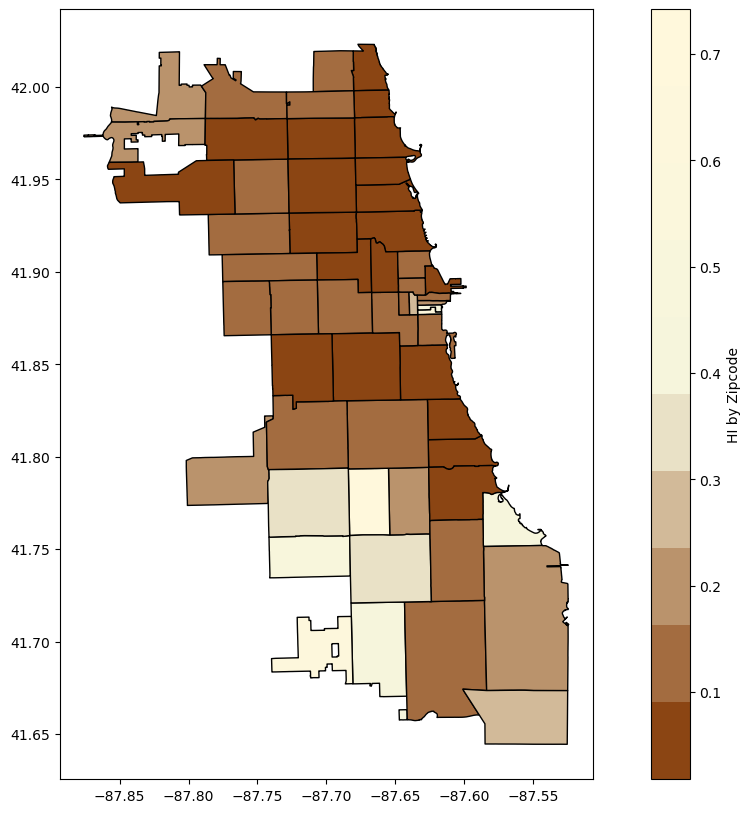

In [142]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load Chicago geospatial data
chicago_geo = gpd.read_file('geo_export_79baedc3-c351-4a70-8a84-ae3b62fc4f7b.shp')

# Assuming final_df is your DataFrame with Zipcode and HI_zipcode
# Convert Zipcode in your DataFrame to string and remove trailing '.0'
final_df['Zipcode'] = final_df['Zipcode'].astype(str).str.replace('.0', '', regex=False)

# Convert the zipcode column in the shapefile to string if it's not already
chicago_geo['zip'] = chicago_geo['zip'].astype(str)

# Merge your DataFrame with the Chicago geospatial data
merged = chicago_geo.merge(final_df, left_on='zip', right_on='Zipcode')

# Define a custom colormap (brown, beige, cream)
colors = ['#8B4513', '#F5F5DC', '#FFF8DC']  # Brown, Beige, Cream
cmap = LinearSegmentedColormap.from_list('custom', colors, N=10)

# Plotting with the custom colormap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='HI_zipcode', ax=ax, legend=True,
            cmap=cmap,  # Custom colormap
            legend_kwds={'label': "HI by Zipcode"},
            edgecolor='black')
plt.show()
